# Redes reales

Importemos las librerías que podríamos usar:

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Podemos descargar una base de datos, por ejemplo, de las siguientes páginas:

https://networkrepository.com/index.php

https://snap.stanford.edu/data/#citnets

https://toreopsahl.com/datasets/

https://networkdata.ics.uci.edu/

https://www.re3data.org/

https://www.web-of-life.es/map.php

https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/T4HBA3

http://www-personal.umich.edu/~mejn/netdata/

https://math.nist.gov/MatrixMarket/

#  ¿qué datos son? ¿cómo están relacionados los nodos? ¿cuántos son? ¿cuántas aristas tienen? 

El siguiente ejemplo es de https://networkrepository.com/index.php, en la pestaña de "REPOSITORY" se elige "Animal Social Ntworks". De la lista, elegimos "aves-weaver-social" y se puede ver una descripción de la red y algunas de sus características. Se descarga la base y se descomprime. Se va a leer con pandas (las primeras 10 filas para notar algo):

In [17]:
pd.read_csv('aves-weaver-social-16.edges', nrows = 10)

,321 322
0,323 324
1,323 325
2,323 326
3,323 327
4,327 325
5,327 326
6,328 329
7,328 330
8,328 331
9,328 332


Notemos que el encabezado es en realidad un dato (la arista (1,2)), por lo que hay que decirle a python que no queremos encabezado. Por otro lado, lo pone como una sola columna, hay que separarlas con un espacio:

In [5]:
aves =pd.read_csv('aves-weaver-social-16.edges', header = None, sep=' ')

In [6]:
aves

,0,1
0,321,322
1,323,324
2,323,325
3,323,326
4,323,327
...,...,...
172,329,330
173,329,355
174,335,372
175,335,367


In [7]:
aves.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       177 non-null    int64
 1   1       177 non-null    int64
dtypes: int64(2)
memory usage: 2.9 KB


Podría darse el caso en que se tengan que descartar algunas primeras o últimas filas, se puede hacer con "skiprows" y "skipfooter".

Para generar la red, usamos la función "from_pandas_edgelist", que en general sirve para generar redes desde un DataFrame. Ponemos como fuente de la arista la columna "0" y como destino la columna "1":

In [8]:
G=nx.from_pandas_edgelist(aves, source = 0, target = 1)

Podemos visualizarla y describirla con los conceptos vistos hasta ahora (densidad, grado promedio, diámetro, componentes, etc.):

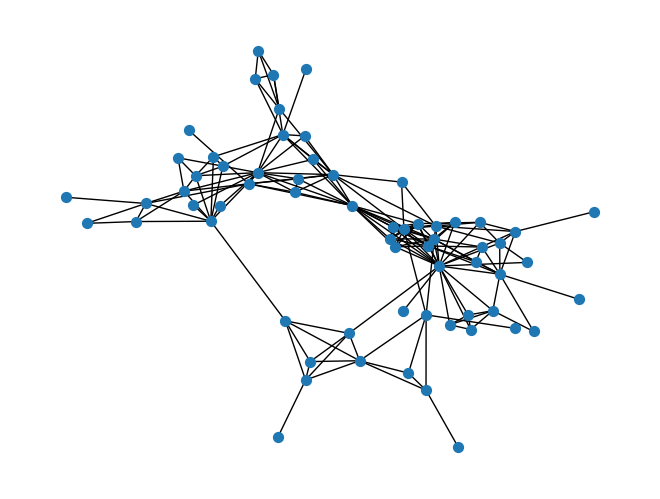

In [9]:
nx.draw(G, node_size = 50)

Otra forma es hacer una lista de parejas de las columnas que queremos conectar, con la propiedad ".values":

In [10]:
aristas = aves[[0,1]].values
aristas

array([[321, 322],
       [323, 324],
       [323, 325],
       [323, 326],
       [323, 327],
       [327, 325],
       [327, 326],
       [328, 329],
       [328, 330],
       [328, 331],
       [328, 332],
       [328, 333],
       [334, 324],
       [334, 335],
       [334, 336],
       [334, 337],
       [338, 339],
       [338, 324],
       [338, 340],
       [338, 341],
       [342, 343],
       [337, 336],
       [337, 340],
       [337, 344],
       [337, 335],
       [337, 345],
       [346, 329],
       [346, 347],
       [346, 348],
       [346, 349],
       [350, 351],
       [350, 352],
       [350, 353],
       [350, 211],
       [350, 354],
       [350, 220],
       [350, 329],
       [350, 355],
       [350, 356],
       [350, 357],
       [350, 341],
       [350, 331],
       [358, 324],
       [349, 329],
       [349, 348],
       [349, 347],
       [359, 339],
       [359, 355],
       [359, 333],
       [339, 360],
       [339, 333],
       [339, 322],
       [339,

Y después agregar las aristas a la red con la función "add_edges_from":

In [11]:
G1 = nx.Graph()
G1.add_edges_from(aristas)

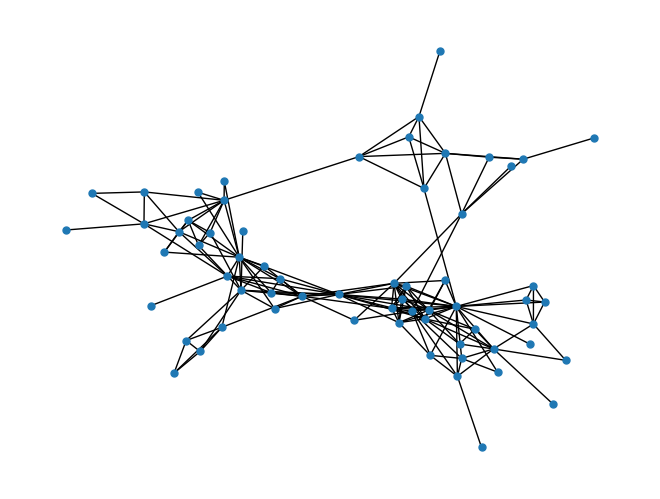

In [12]:
nx.draw(G1, node_size = 25)

In [19]:
from pathlib import Path
import networkx as nx

D = Path("data\dataverse\gexf")  # change this

graphs = {}  # {int_id: nx.Graph}

for fp in D.iterdir():
    if fp.suffix.lower() != ".gexf":      # skips .DS_Store and anything else
        continue
    try:
        movie_id = int(fp.stem)           # expects "1.gexf", "914.gexf", etc.
    except ValueError:
        continue                          # skip weird names if any

    # node_type=int makes node IDs usable as ints (optional; remove if you want strings)
    G = nx.read_gexf(fp, node_type=int)
    graphs[movie_id] = G

print("loaded:", len(graphs), "graphs")
print("example:", min(graphs), graphs[min(graphs)].number_of_nodes(), graphs[min(graphs)].number_of_edges())


<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\herie\AppData\Local\Temp\ipykernel_25984\1577325245.py:4: SyntaxWarning: invalid escape sequence '\d'
  D = Path("data\dataverse\gexf")  # change this


loaded: 773 graphs
example: 1 21 68


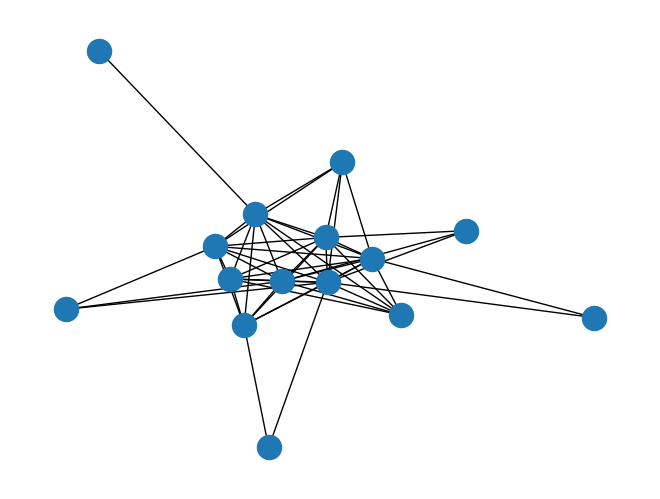

In [20]:
nx.draw(G)